In [1]:
from fastai.vision.all import *
from pathlib import Path
import h5py
from matplotlib import cm
import matplotlib.pyplot as plt

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [2]:
path = '/kaggle/input/jet-images-train-val-test/jet-images_train.hdf5'

    
h5_file = h5py.File(path, 'r')
signal_data = h5_file['signal']
image_data = h5_file['image']



In [3]:
signal_array = np.array(signal_data)
image_array = np.array(image_data)
len(image_array)

628320

In [4]:
# Filter the image_array based on signal_array
filtered_images = image_array[signal_array == 1]

# Calculate the mean image
mean_image = np.mean(filtered_images, axis=0)

In [5]:
len(filtered_images)

314160

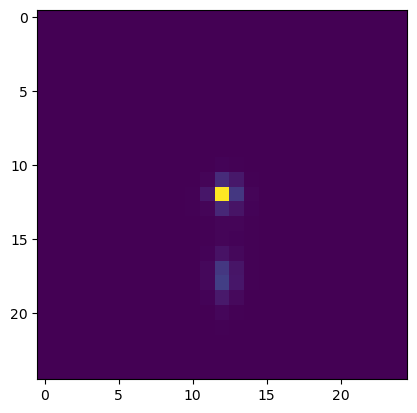

In [6]:
plt.imshow(mean_image)
plt.show()

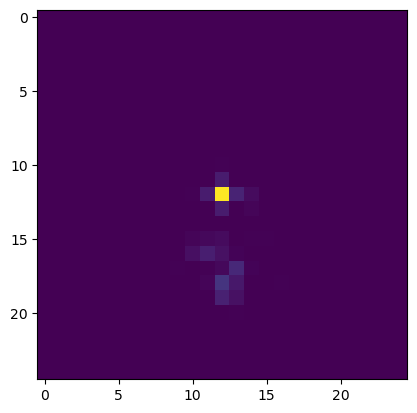

In [7]:
plt.imshow(filtered_images[7])
plt.show()

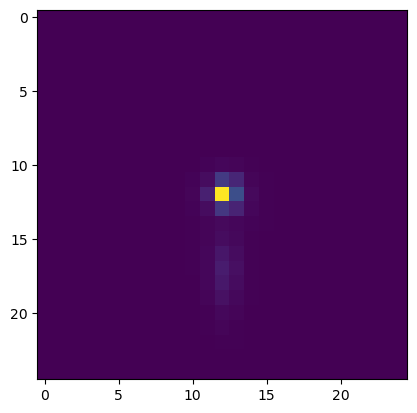

In [8]:
filtered_images_general = image_array[signal_array == 0]
mean_image_general = np.mean(filtered_images_general, axis=0)

plt.imshow(mean_image_general)
plt.show()

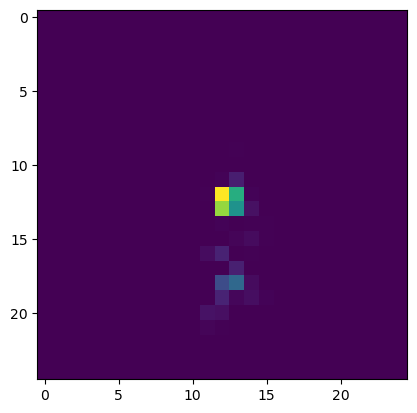

In [9]:
plt.imshow(filtered_images_general[22])
plt.show()

In [10]:
path_val = '/kaggle/input/jet-images-train-val-test/jet-images_val.hdf5'

h5_file_val = h5py.File(path_val, 'r')
signal_data_val = h5_file_val['signal']
image_data_val = h5_file_val['image']


signal_array = np.array(signal_data_val)
image_array = np.array(image_data_val)

print(len(signal_array))
print(len(image_array))


157080
157080


In [11]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score

def mean_image_predict(threshold):
    
    mean_image = np.mean(image_array[signal_array == 1], axis=0)


    similarities = np.zeros(len(image_array))
    for i, image_vec in enumerate(image_array):
        similarities[i] = cosine_similarity(image_vec.reshape(1, -1), mean_image.reshape(1, -1))


    threshold = threshold
    predicted_labels = np.where(similarities > threshold, 1, 0)
    accuracy = accuracy_score(signal_array, predicted_labels)

    
    return accuracy


In [12]:
test_num = [0.9, 0.81, 0.79, 0.6, 0.5, 0.4]

for i in test_num:
    test = mean_image_predict(i)
    print(f'With a threshold of {i} we have a accuracy: {test}')

With a threshold of 0.9 we have a accuracy: 0.5487967914438503
With a threshold of 0.81 we have a accuracy: 0.5576648841354723
With a threshold of 0.79 we have a accuracy: 0.5574102368220015
With a threshold of 0.6 we have a accuracy: 0.5403106697224345
With a threshold of 0.5 we have a accuracy: 0.5311115355233003
With a threshold of 0.4 we have a accuracy: 0.5223071046600458


In [13]:
preds = []

In [14]:
def predict(array):
    general = np.abs(np.mean(mean_image_general) - np.mean(array))
    boson = np.abs(np.mean(mean_image) - np.mean(array))
    
    if boson < general:
        preds.append(1.0)
    else:
        preds.append(0.0)

In [15]:
for image in image_data_val:
    predict(image)

In [16]:
def accuracy(predictions, labels):
    """Calculate the accuracy of the predictions."""
    num_correct = sum([1 for i in range(len(predictions)) if predictions[i] == labels[i]])
    return num_correct / len(predictions)

In [17]:
accuracy(preds, signal_data_val)

0.5802011713776419